In [1]:
from dask import delayed

In [2]:
def my_square_function(x):
    return x**2

#create delayed version of above function
delayed_square_function = delayed(my_square_function)

#Use the delayed function
delayed_result = delayed_square_function(4)

print(delayed_result)

Delayed('my_square_function-21921735-52c7-47bb-84db-d6e9bc67bf91')


In [3]:
%time
#To Run the calculation
real_result = delayed_result.compute() #Where the actual calculation happen

print(real_result)

CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 3.81 μs
16


In [4]:
delayed_intermediate = delayed(my_square_function)(3)

# These 2 both use delayed_intermediate
delayed_result1 = delayed_intermediate - 5
delayed_result2 = delayed_intermediate + 3

# delayed_intermediate (3 squared) will be computed twice
print('delayed_result1:', delayed_result1.compute())
print('delayed_result2:', delayed_result2.compute())

delayed_result1: 4
delayed_result2: 12


In [5]:
# More efficient version:
import dask

comp_result1, comp_result2 = dask.compute(delayed_result1, delayed_result2)

print('comp_result1:', comp_result1)
print('comp_result2:', comp_result2)

comp_result1: 4
comp_result2: 12


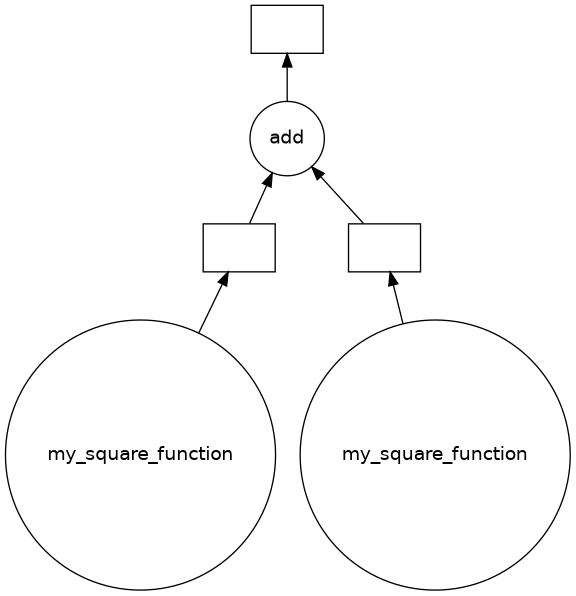

In [6]:
# Create 2 delayed objects
delayed_num1 = delayed(my_square_function)(3)
delayed_num2 = delayed(my_square_function)(4)

# Add them
result = delayed_num1 + delayed_num2

#Plot task graph
result.visualize()

In [7]:
import sys
print(sys.executable)

/home/maludinrady/dask-env/bin/python


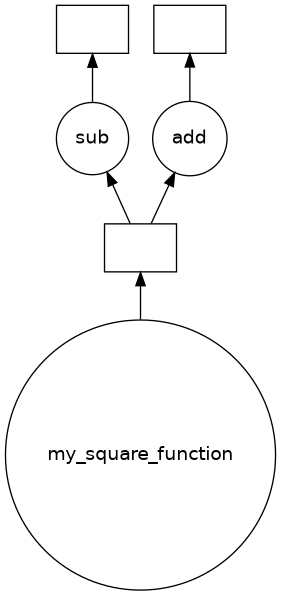

In [8]:
dask.visualize(delayed_result1, delayed_result2)

In [9]:
# GIL Simulation
def sum_to_n(n):
    # Sum number from 0 tp n
    total = 0
    for i in range (n+1):
        total +=i
    return total

# Multi-threading won't help here
# Parallel processing will
sum1 = delayed(sum_to_n)(1000)
sum2 = delayed(sum_to_n)(1000)


In [10]:
sum1

Delayed('sum_to_n-e019ab53-f4a9-4019-9fd3-9cdc3f861a84')

In [ ]:
# Lazy Evaluate Integer (Multiple Threads)
n_songs_in_c, n_songs = 0, 0 

for file in filenames:
    # Load in the data
    df = delayed(pd.read_csv)(file)
    
    # Add to running totals
    n_songs_in_c += (df['key'] == 'C').sum()
    n_songs += df.shape[0]

# Efficiently compute total_n_songs_in_c and total_n_songs
total_n_songs_in_c, total_n_songs = dask.compute(n_songs_in_c, n_songs)

fraction_c = total_n_songs_in_c / total_n_songs
print(total_n_songs, fraction_c)

In [ ]:
# Lazy Evaluate: Array
danceabilities = []

for file in filenames:
	# Lazily load in the data
    df = delayed(pd.read_csv)(file)
    # Calculate the average danceability in the file of songs
    mean_danceability = df['danceability'].mean()
    danceabilities.append(mean_danceability)

# Compute all the mean danceabilities
danceability_list = dask.compute(danceabilities)[0]
# Plot the results
plt.plot(years, danceability_list)
plt.show()

In [ ]:
# Lazy Evaluation, Array lalu diconcat

top_songs = []

for file in filenames:
    df = delayed(pd.read_csv)(file)
    # Find the top 10 most popular songs in this file
    df_top_10 = top_10_most_popular(df)
    top_songs.append(df_top_10)

# Compute the list of top 10s
top_songs_list = dask.compute(top_songs)[0]

# Concatenate them and find the best of the best
top_songs_df = pd.concat(top_songs_list)
df_all_time_top_10 = top_10_most_popular(top_songs_df)
print(df_all_time_top_10)

In [11]:
%time 
import numpy as np
x = np.ones((4000, 6000))

print(x.sum())

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.34 μs
24000000.0


In [12]:
x

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], shape=(4000, 6000))

In [13]:
%time
import dask.array as da
x = da.ones((4000, 6000), chunks=(1000, 2000))

z = x.sum().compute()
print(z)


CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.86 μs
24000000.0


In [14]:
x

dask.array<ones_like, shape=(4000, 6000), dtype=float64, chunksize=(1000, 2000), chunktype=numpy.ndarray>

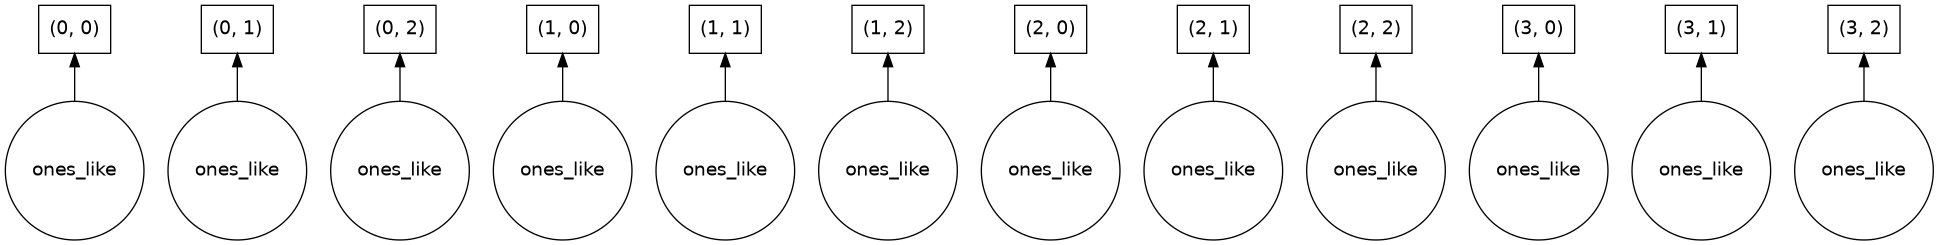

In [15]:
x.visualize()

In [ ]:
# GA DIRUN
# Import dask dataframe as dd
import dask.dataframe as dd

# Load in the DataFrame
df  = dd.read_csv('data/spotify/*.csv', blocksize = "1MB")

# Convert the release_date column from string to datetime
df['release_date']=dd.to_datetime(df['release_date'])

# Show 5 rows of the DataFrame
print(df.head())


In [ ]:
# GA DIRUN
# Read the spotify_parquet folder
df = dd.read_parquet("data/spotify_parquet")

# Find the 10 most popular songs
top_10_songs = df.nlargest(10, 'popularity')

# Convert the delayed result to a pandas DataFrame
top_10_songs_df = top_10_songs.compute()

print(top_10_songs_df)

In [ ]:
# GA DIRUN
# Extract the months from the release_date column using its datetime accessor 
months = df['release_date'].dt.month

# Group the danceabilities by month
monthly_groupby = df['danceability'].groupby(months)

# Find the mean danceability by month
monthly_danceability = monthly_groupby.mean()

# Compute the result
monthly_danceability_result = monthly_danceability.compute()

monthly_danceability_result.plot()
plt.show()

In [ ]:
# GA DIRUN - XARRAY
# Open the ERA5 dataset
ds = xr.open_zarr("data/era_eu.zarr")

# Select the zeroth time in the DataSet
ds_sel = ds.isel(time=0)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 3))

# Plot the zeroth temperature field on ax1
ds_sel['temp'].plot(ax=ax1)

# Plot the zeroth precipitation field on ax2
ds_sel['precip'].plot(ax=ax2)
plt.show()

In [ ]:
from dask.distributed import LocalCluster

cluster = LocalCluster(
    n_workers=4,  # Number of workers
    threads_per_worker=2,  # Number of threads per worker
    processes=True,  # Use processes instead of threads)
)
print(cluster)
print(cluster.dashboard_link)

LocalCluster(9deb670a, 'tcp://127.0.0.1:39423', workers=4, threads=8, memory=31.34 GiB)
http://127.0.0.1:8787/status


In [20]:
cluster.close()

In [21]:
# Yang ini jatuhnya tiap thread ada 2 thread (Lebih besar resourcenya)
cluster = LocalCluster(
    n_workers=4,  
    threads_per_worker=2, 
    processes=False
)
print(cluster)
print(cluster.dashboard_link)

LocalCluster(2c890bc0, 'inproc://172.30.53.158/1359/31', workers=4, threads=8, memory=31.34 GiB)
http://172.30.53.158:38957/status


/home/maludinrady/dask-env/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38957 instead
  warnings.warn(


In [22]:
cluster.close()

In [23]:
cluster = LocalCluster(
    processes=True
)
print(cluster)
print(cluster.dashboard_link)

/home/maludinrady/dask-env/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34697 instead
  warnings.warn(


LocalCluster(fbc7cfda, 'tcp://127.0.0.1:45031', workers=4, threads=12, memory=31.34 GiB)
http://127.0.0.1:34697/status


In [24]:
cluster.close()

In [25]:
cluster = LocalCluster(
    processes=False
)
print(cluster)
print(cluster.dashboard_link)

LocalCluster(68d00a28, 'inproc://172.30.53.158/1359/46', workers=1, threads=12, memory=31.34 GiB)
http://172.30.53.158:44287/status


/home/maludinrady/dask-env/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44287 instead
  warnings.warn(


In [26]:
cluster.close()

In [ ]:
# GA DIRUN
# Dask ML Wrapper (1 loop)
# Import the SGDRegressor and the Incremental wrapper
from sklearn.linear_model import SGDRegressor
from dask_ml.wrappers import Incremental

# Create a SGDRegressor model
model = SGDRegressor()

# Wrap the model so that it works with Dask
dask_model = Incremental(model, scoring='neg_mean_squared_error')

# Fit the wrapped model
dask_model.fit(dask_X, dask_y)